In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('coggle_train.csv',)

In [3]:
data = data.sort_values('id')

In [4]:
data.head()

,id,text,cat
2661,1,"This painter's indulgence of visual fantasy, a...",Fine Arts
2662,2,"He married Marie-Anne Gerard, but five years l...",Fine Arts
2663,3,"""I was once what you are, and what I am you wi...",Fine Arts
2664,4,Velvets gave way to brocades and silks.\tDarke...,Fine Arts
2665,6,"The name, or rather nickname, is the same.\tOn...",Fine Arts


In [5]:
data = data[['text', 'cat']]

In [6]:
data.head()

,text,cat
2661,"This painter's indulgence of visual fantasy, a...",Fine Arts
2662,"He married Marie-Anne Gerard, but five years l...",Fine Arts
2663,"""I was once what you are, and what I am you wi...",Fine Arts
2664,Velvets gave way to brocades and silks.\tDarke...,Fine Arts
2665,"The name, or rather nickname, is the same.\tOn...",Fine Arts


In [7]:
data = data[pd.notnull(data['text'])]

In [8]:
data.head()

,text,cat
2661,"This painter's indulgence of visual fantasy, a...",Fine Arts
2662,"He married Marie-Anne Gerard, but five years l...",Fine Arts
2663,"""I was once what you are, and what I am you wi...",Fine Arts
2664,Velvets gave way to brocades and silks.\tDarke...,Fine Arts
2665,"The name, or rather nickname, is the same.\tOn...",Fine Arts


In [9]:
data['category_id'] = data['cat'].factorize()[0]

In [10]:
data['text'][0]

'Michel Mayor used astrometric data provided by Hipparcos in conjunction with the radial velocity method to investigate ten candidates for them.\tS Ori 47 has the lowest mass of any known one of these and they release substantial amounts of infrared radiation.\tKnown to fuse deuterium on a small scale, their name was coined by Jill Tarter and Gliese 229B was the first one to be confirmed.\tThe maximum mass of one of these is believed to be approximately 84 times the mass of Jupiter, or the largest mass that is insufficient for normal hydrogen fusion.\tFor 10 points, name this dimmest and least massive star, sometimes referred to as a "failed star.\t"'

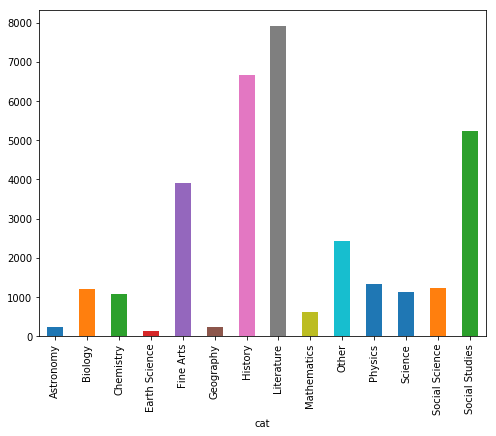

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (8,6))
data.groupby('cat').text.count().plot.bar(ylim=0)



In [11]:
import matplotlib.pyplot as plt 
figsize = plt.figure(figsize = (8,10))
data.groupby('cat').text.count().plot.bar(ylim=0)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf= True, min_df= 5,ngram_range=(1,2),norm= 'l2',stop_words= 'english')

In [13]:
features = tfidf.fit_transform(data.text).toarray()

In [14]:
features.shape

(33391, 65836)

In [15]:
labels = data['category_id']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['cat'], random_state= 0)

In [18]:

from sklearn.feature_extraction.text import CountVectorizer

In [19]:
count = CountVectorizer()

In [20]:
x_train_count = count.fit_transform(X_train)

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

In [22]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(x_train_count)

In [23]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [37]:
print(clf.predict(count.transform(['This politician charged that the 9/11 hijackers entered the United States from Canada and told a room of Latino students that "some of you look a little more Asian" in a misguided attempt to defend an ad showing bandana-clad Mexicans sneaking across the border to join a gang.	This politician also announced that Frankford, Texas and Dearborn, Michigan were under (*) sharia.	After defeating Sue Lowden, she held rallies in Searchlight, the hometown of her opponent, who came from behind to defeat her in the largest Senate election turnaround in recent history.	For 10 points, name this Tea Party-backed Senate candidate who lost in Nevada to Harry Reid.'])))

['History']


In [35]:
y_pred = clf.predict(count.transform(X_test))

In [36]:
y_pred

array(['Social Studies', 'Literature', 'Social Studies', ..., 'History',
       'History', 'Literature'], dtype=object)

In [26]:
from sklearn import metrics

In [27]:
print(metrics.classification_report(y_test,y_pred, labels= data.cat, target_names=data['cat'].unique()))

C:\Users\Alekhya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 33391, does not match size of target_names, 14
  .format(len(labels), len(target_names))


                precision    recall  f1-score   support

     Fine Arts       0.93      0.76      0.84       949
       History       0.93      0.76      0.84       949
    Literature       0.93      0.76      0.84       949
       Biology       0.93      0.76      0.84       949
         Other       0.93      0.76      0.84       949
     Astronomy       0.93      0.76      0.84       949
     Chemistry       0.93      0.76      0.84       949
 Earth Science       0.93      0.76      0.84       949
   Mathematics       0.93      0.76      0.84       949
       Physics       0.93      0.76      0.84       949
Social Studies       0.93      0.76      0.84       949
       Science       0.93      0.76      0.84       949
Social Science       0.93      0.76      0.84       949
     Geography       0.93      0.76      0.84       949

   avg / total       0.81      0.71      0.71  40886930



C:\Users\Alekhya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
